# Project: Investigate a Dataset - [TMDb_Movie_Data]
>I will investigate this Dataset by applying Data Analysis Proccess on it using NUMPY, PANDAS, MATPLOTLIB and 
some useful packages to achieve my investigate.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
 including user ratings and revenue. [here]( https://www.kaggle.com/tmdb/tmdb-movie-metadata ). 


### Question(s) for Analysis
>Which genres are most popular from year to year?

>What kinds of properties are associated with movies that have high revenues?

>Which movie achieved the highest revenue and the lowest one?

>Which movie achieved the highest or lowest votes?

>Which movie cost highest and lowest Budget?

>In which year release highest number of movies?

>Top 10 movies which achieved highest profits?

>Top 10 Production Companies produced higher number of release Movies?

>Top 10 Director Who directs highest number of movies movies?

>Most popular star cast?
 

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Now I will take a look inside the dataset to check and find out all info I need to begin and dropping unused data.


### General Properties


In [243]:
#folder_name = 'Database_Soccer'
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [244]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                5169 non-null   float64
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   director              10865 non-null  object 
 7   keywords              10865 non-null  object 
 8   runtime               10865 non-null  int64  
 9   genres                10865 non-null  object 
 10  production_companies  10865 non-null  object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
 15  Profit             

In [310]:
df.shape

(10865, 16)

In [248]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [249]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

After check the Dataset I find out that it contains:

>     Number of Rows = 10866.
>     Number of Columns = 21.
>     Some columns contain NaN values.
>     Some columns's values is count of money but it's 0 value and there's no currency: 
>            I will use dolar as currency.
>     Some of the nan values is in String dtype so:
>            I will use fill nan values with zero. 
         

In [250]:
df = df.fillna(0)


### Data Cleaning

>  Drop Duplicate rows.

>  Remove unuseble data.

>  Cahnge type of release date column to datetime.

>  Remove items having zero value of budget and revenue.

In [251]:
sum(df.duplicated())

1

In [252]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [253]:
#after dropping
df.shape

(10865, 21)

In [254]:
#remove unuseable data
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [255]:
#after remove
df.shape

(10865, 15)

In [256]:
another_df['release_date']=pd.to_datetime(another_df['release_date'])
another_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [279]:
#removing zero values in the budget and revenue columns
df[(df['budget']==0)].shape[0]
df[(df['revenue']==0)].shape[0]

6016

In [280]:
df.isnull().sum()

id                         0
popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
Profit                  5696
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section.


### Research Question 1:: Which genres are most popular from year to year?

In [311]:
#map all the rows of genres in a list.
genre_details = list(map(str,(df['genres'])))

genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']
#create new array to store our genres clean
modify_genre = []

for i in range(0, genre_details.__len__()):
    temp = genre_details[i]
    if type(temp)==list:

        for a in range(0, temp.__len__()):
            asd = temp[a]
            if genre.__contains__(asd):
                modify_genre.append(asd)
                continue
            elif genre.__contains__(asd[:-1]):
                modify_genre.append(asd[:-1])
                continue

            elif asd.__contains__('0'):
                continue

    elif genre.__contains__(temp):
        modify_genre.append(temp)
        continue
    else:
        continue



#make the numpy array of year and popularity which contain all the rows of release_year and popularity column.
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)



for i in range(0,genre_details.__len__()):
    popularity_df.loc[modify_genre, year[i]] = popularity_df.loc[modify_genre, year[i]] + popularity[i]
    
    

#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head(3)



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,...,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607
Science Fiction,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,...,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607
Fantasy,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,...,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607


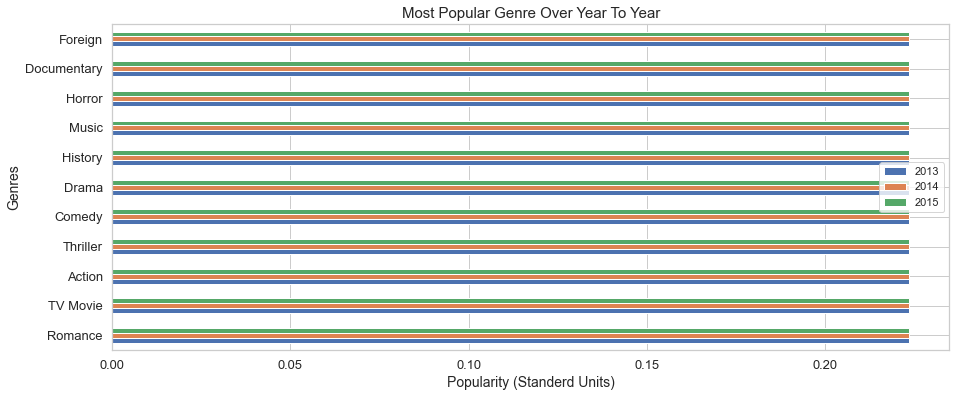

In [300]:
#plot the barh plot of the standardised data.
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

### Research Question 2:: What kinds of properties are associated with movies that have high revenues?

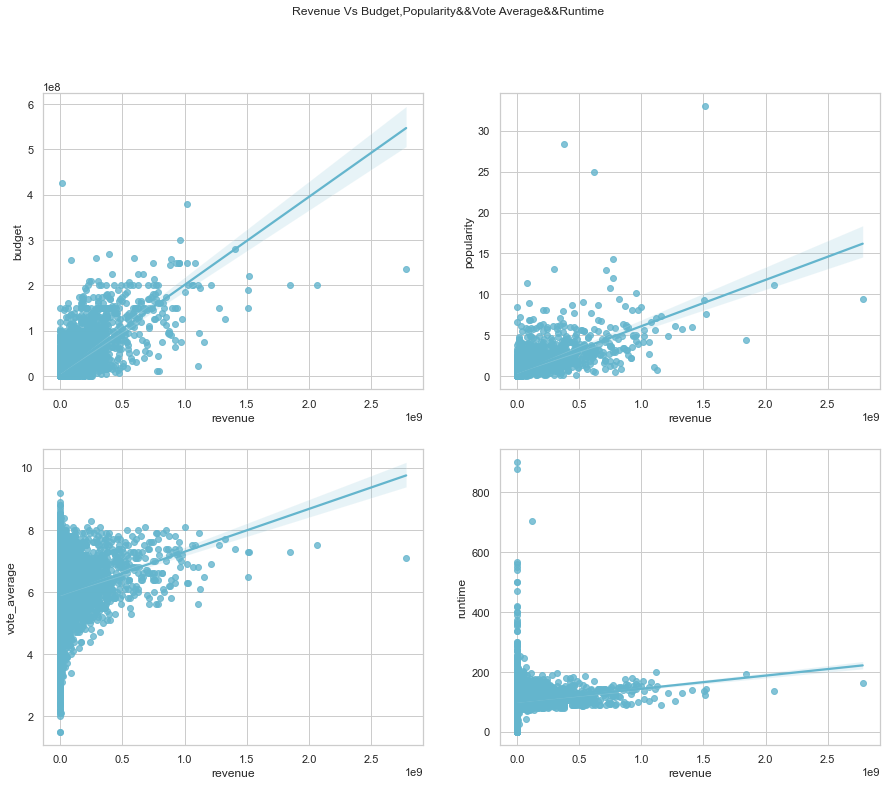

In [262]:
details = pd.DataFrame(df['revenue'].sort_values(ascending=False))
another_data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in another_data_set:
    details[i] = df[i]

details.head(3)

fig, axes = plt.subplots(2,2,figsize = (15,12))
fig.suptitle("Revenue Vs Budget,Popularity&&Vote Average&&Runtime")
sns.regplot(x=df['revenue'], y=df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=df['revenue'], y=df['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=df['revenue'], y=df['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=df['revenue'], y=df['runtime'],color='c',ax=axes[1][1])
sns.set_style("whitegrid")

### Research Question 3:: Top 5 movies which achieved the highest revenue and the lowest one?

Highest revenue :  Avatar
Lowest revenue  :  Wild Card


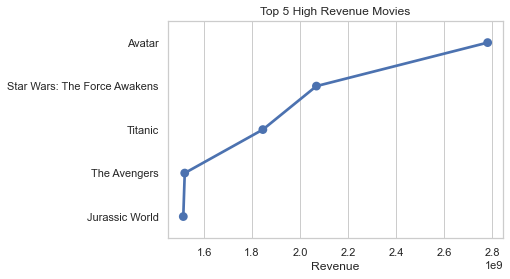

In [263]:
#use the function 'idmin' and 'idmax' to find the index of lowest and Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    min_index = df[x].idxmin() 
    max_index = df[x].idxmax()
    highest = pd.DataFrame(df.loc[max_index,:])
    lowest = pd.DataFrame(df.loc[min_index,:])
    print("Highest "+ x + " : ",df['original_title'][max_index])
    print("Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([highest,lowest],axis = 1)

#To find out movie with highest and lowest revenue
find_minmax('revenue')

#top 5 movies which made highest revenue.
details = pd.DataFrame(df['revenue'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

#extract the top 5 movies with high revenue data from the list and dataframe.
x = list(data[:5])
y = list(details['revenue'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 5 High Revenue Movies")
ax.set_xlabel("Revenue")
sns.set_style("darkgrid")

### Research Question 4:: Top 5 movies which  achieved the highest or lowest votes?

Highest vote_average :  The Story of Film: An Odyssey
Lowest vote_average  :  Transmorphers


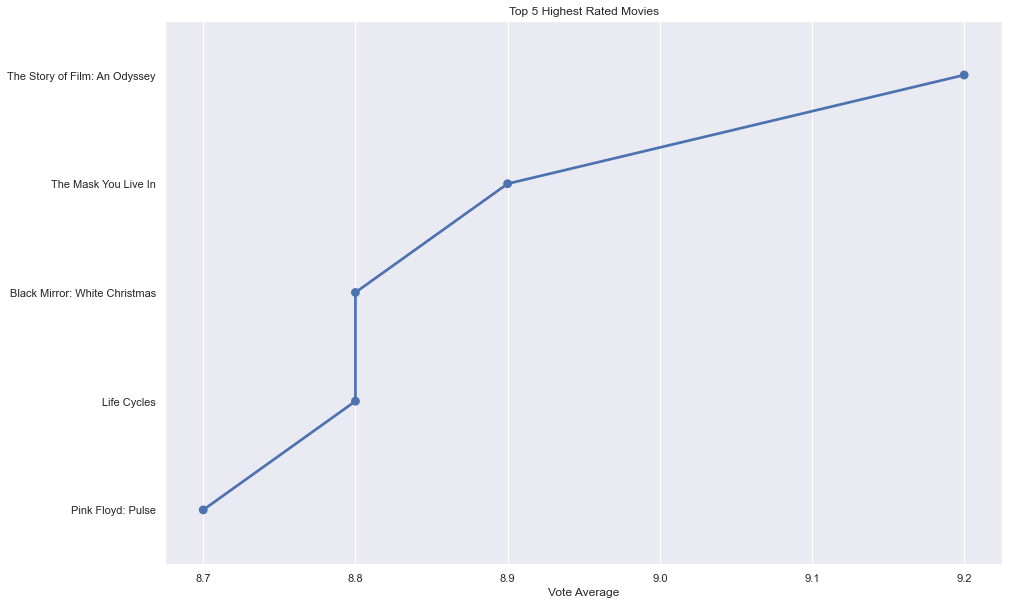

In [264]:
#find the movie with highest and lowest votes.
find_minmax('vote_average')

#top 5 highest rated movies.
details = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

##extract the top 5 highly rated movies data from the list and dataframe.
x = list(data[:5])
y = list(details['vote_average'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 5 Highest Rated Movies")
ax.set_xlabel("Vote Average")
sns.set_style("darkgrid")

### Research Question 5::  Top 5 movies which cost highest and lowest Budget?

Highest budget :  The Warrior's Way
Lowest budget  :  Fear Clinic


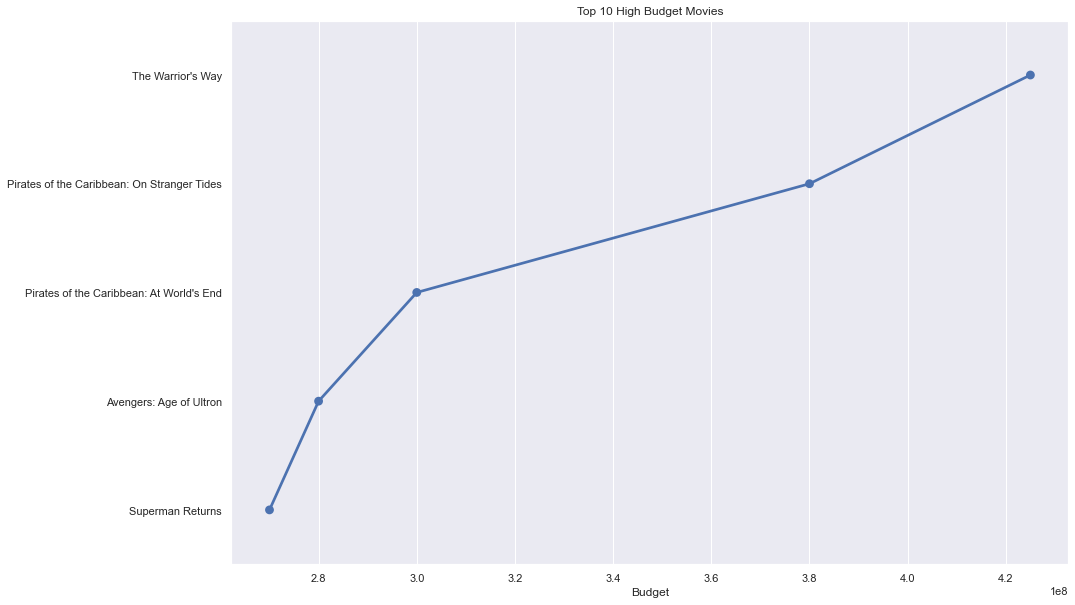

In [265]:
#find the top 5 movies with highest and lowest budget.
#make sure that movie with budget zero didn't affect the result.
#change the zero into NAN in budget column.
df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')        


#make a plot which contain top 5 highest budget movies.
details = pd.DataFrame(df['budget'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))

#extract the top 5 budget movies data from the list and dataframe.
x = list(data[:5])
y = list(details['budget'][:5])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Top 10 High Budget Movies")
ax.set_xlabel("Budget")
sns.set_style("darkgrid")

### Research Question 6:: In which year release highest number of movies?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


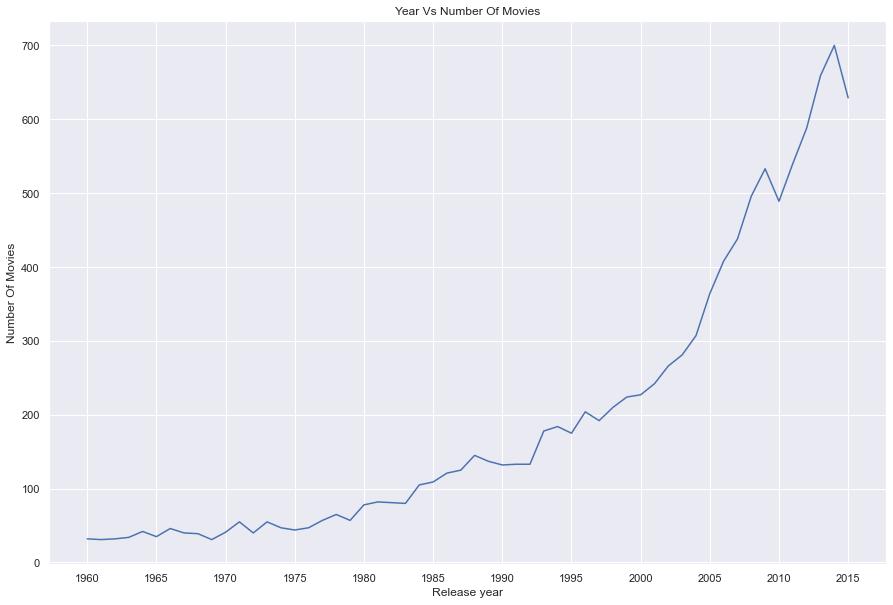

In [266]:
#group each year and count the number of movies in each year 
data=df.groupby('release_year').count()['id']
print(data.tail())

#group the data according to release year and count total number of movies in each year and plot it.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Year Vs Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
sns.set_style("whitegrid")

### Research Question 7:: Top 5 movies which achieved highest or lowest profits?

Highest Profit :  Avatar
Lowest Profit  :  The Warrior's Way


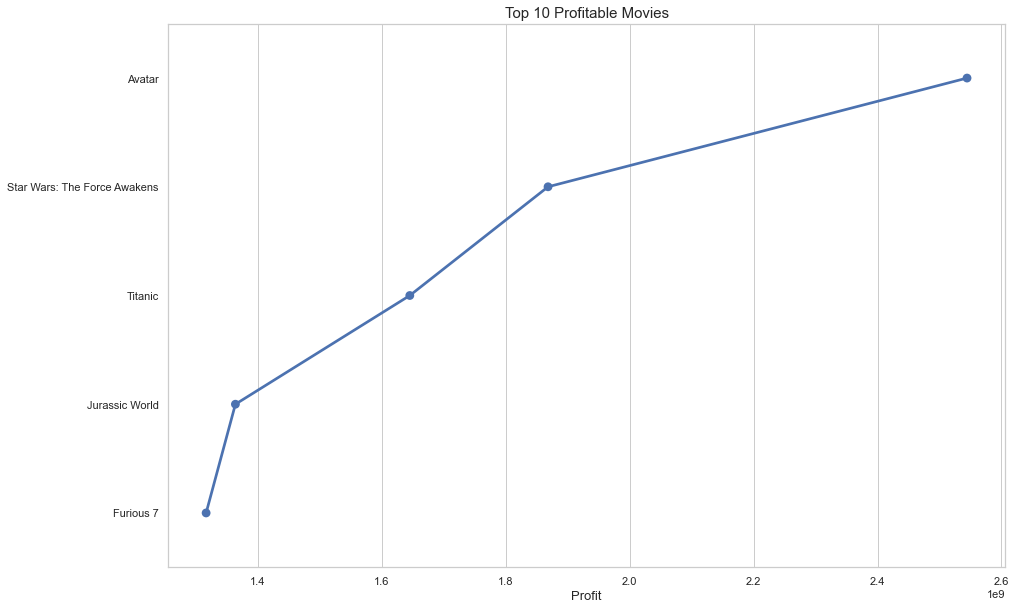

In [267]:
#calculate Profit for each of the movie and add a new column in the dataframe name 'Profit'
df['Profit'] = df['revenue'] - df['budget']

#call the find_minmax function.
find_minmax('Profit')

#top 5 movies which earn highest profit.
details = pd.DataFrame(df['Profit'].sort_values(ascending = False))
details['original_title'] = df['original_title']
data = list(map(str,(details['original_title'])))
x = list(data[:5])
y = list(details['Profit'][:5])

#usinf pointplot for top 5 profitable movies.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 8:: Top 10 Production Companies produced higher number of release Movies?

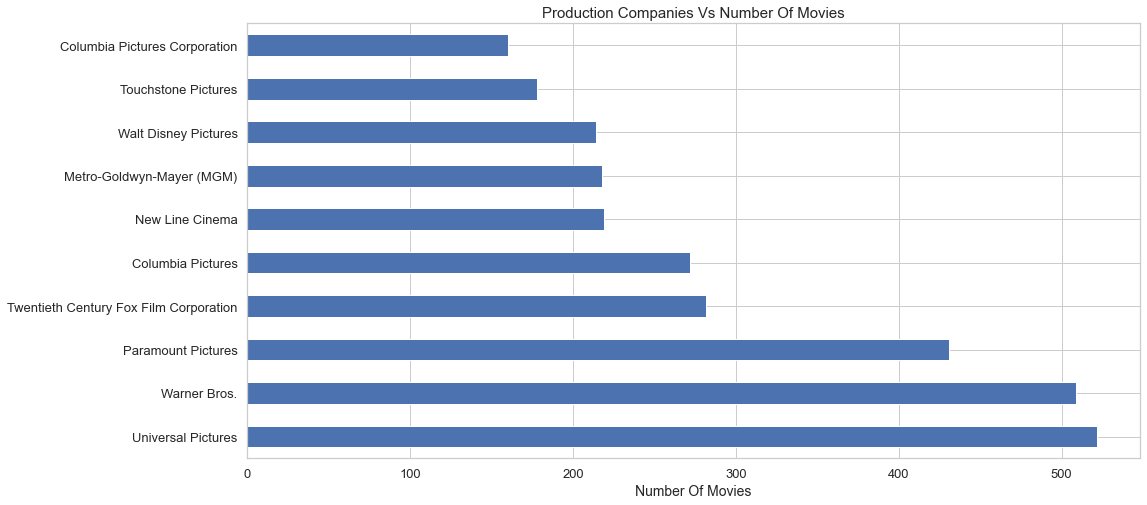

In [297]:
def count_genre(x):
    x_details = list(map(str,(df[x])))
    modify_genre = []

    for item in x_details:
        temp = item.split('|')
        if type(temp) == list:

            for a in range(0, temp.__len__()):
                asd = temp[a]
                if x_details.__contains__(asd) and  asd != '0':
                    modify_genre.append(asd)
                    continue
                elif x_details.__contains__(asd[:-1]) and asd != '0':
                    modify_genre.append(asd[:-1])
                    continue

                else:
                    continue

        elif x_details.__contains__(temp) and  temp != '0':
            modify_genre.append(temp)
            continue
        else:
            continue


    data = pd.Series(modify_genre)
    #conts each of the genre and return.
    details = data.value_counts(ascending=False)
    return details


production_companies = count_genre('production_companies')

#plot barh plot.
production_companies.iloc[:10].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")


### Research Question 9:: Top 10 Director Who directs highest number of movies movies?

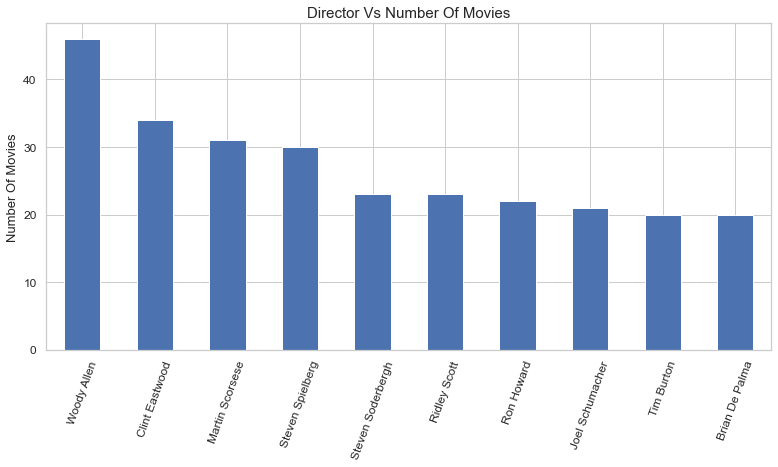

In [298]:
#count number of movies directed by each diretor.
director_movies_counter = count_genre('director')

#plot barh graph
director_movies_counter.iloc[:10].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Research Question 10:: Most popular star cast?

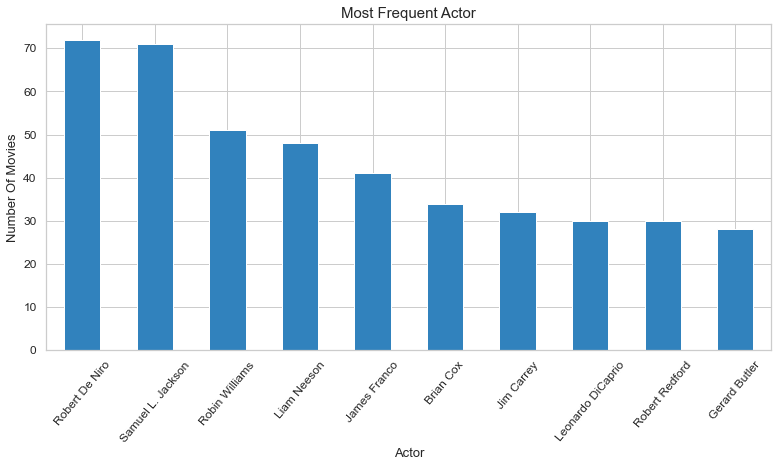

In [299]:


#count number of movies done by each actor.
actor_flims_counter = count_genre('cast')


actor_flims_counter.iloc[:10].plot.bar(figsize=(13,6),colormap='tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 50)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions

<ul>
<li>Movies with higher budgets have shown a corresponding increase in the revenues.</li>
<li>Maximum Number Of Movies Release In year 2014.</li>
<li>'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies and 'The Warrior's Way' is the lowest profitable movie.</li>       
<li>Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.</li>    
<li>'Woody Allen' and 'Clint Eastwood' the most directors Who directs highest number of movies movies</li> 
<li>'Robert De Niro' and 'Samuel L.Jackson' are the most popular star cast</li>    
    
</ul>

### Limitations
<ul>
<li>It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such.</li>
<li> If we release a movie with these characteristics, it gives people high expectations from this movie.</li>
<li> This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.</li>    
<li>During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase.</li>
<li> This increases the time taken in calculating the result.</li>    

</ul>

In [307]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1